# TASK-7: PCA<a href="#TASK-1:-PCA" class="anchor-link">¶</a>

-   use the sklearn utility to load the *wine dataset*
    (`sklearn.dataset.load_wine`)
-   apply PCA to reduce the dimensionality of the dataset and to enable
    its visualization
-   visualize the reduced dataset using a scatter plot, representing
    instances from different classes with different colors.

In [1]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [4]:
dataset = load_wine()

In [5]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [7]:
df = pd.DataFrame(dataset.data,columns  = dataset.feature_names)
df['Class'] = dataset.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
df.drop('Class',axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
X = df.drop('Class',axis = 1).values

### Apply PCA on unscaled data<a href="#Apply-PCA-on-unscaled-data" class="anchor-link">¶</a>

In [10]:
pca_unscaled = PCA(n_components=2)
X_unscaled_PCA = pca_unscaled.fit_transform(X)

In [11]:
np.round(pca_unscaled.components_,3)

array([[ 0.002, -0.001,  0.   , -0.005,  0.018,  0.001,  0.002, -0.   ,
         0.001,  0.002,  0.   ,  0.001,  1.   ],
       [ 0.001,  0.002,  0.005,  0.026,  0.999,  0.001, -0.   , -0.001,
         0.005,  0.015, -0.001, -0.003, -0.018]])

In [12]:
pca_unscaled.explained_variance_ratio_

array([0.99809123, 0.00173592])

### Apply PCA on scaled data<a href="#Apply-PCA-on-unscaled-data" class="anchor-link">¶</a>

In [13]:
pca_scaled = PCA(n_components=2)
X_scaled_PCA = pca_scaled.fit_transform(StandardScaler().fit_transform(X))

In [14]:
np.round(pca_scaled.components_,3)

array([[ 0.144, -0.245, -0.002, -0.239,  0.142,  0.395,  0.423, -0.299,
         0.313, -0.089,  0.297,  0.376,  0.287],
       [-0.484, -0.225, -0.316,  0.011, -0.3  , -0.065,  0.003, -0.029,
        -0.039, -0.53 ,  0.279,  0.164, -0.365]])

In [15]:
pca_scaled.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

### Visualize the transformed dataset on a scatter plot<a href="#Apply-PCA-on-unscaled-data" class="anchor-link">¶</a>

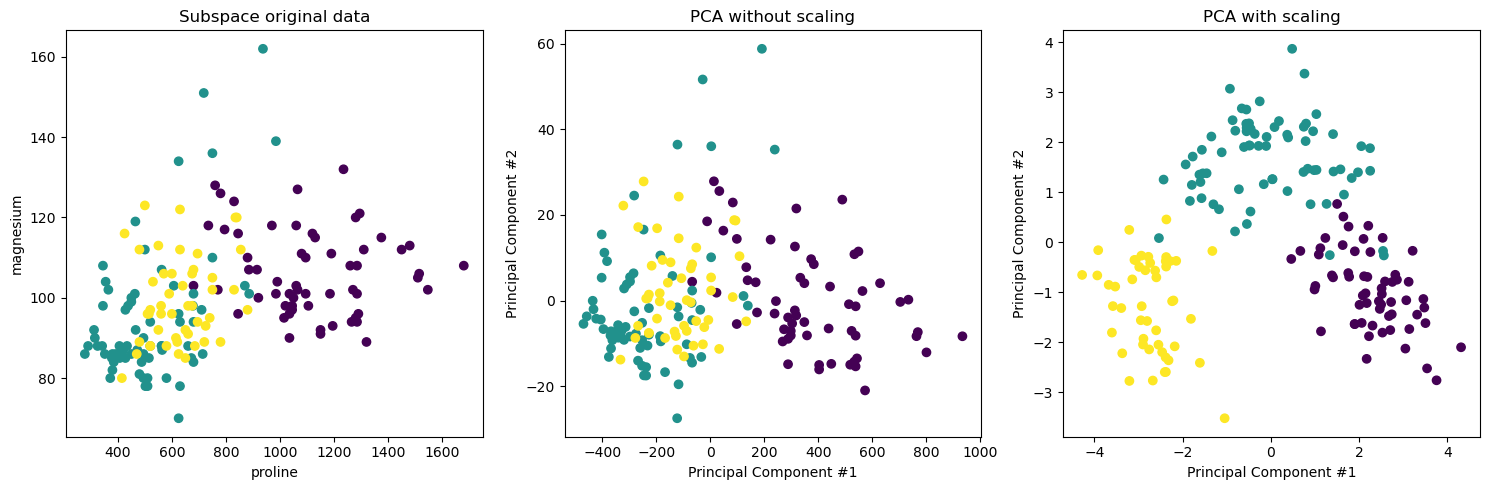

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")
ax1.scatter(X[:,-1],X[:,4], c = df['Class'])
ax1.set_xlabel('proline')
ax1.set_ylabel('magnesium')
ax1.set_title('Subspace original data')

ax2.scatter(X_unscaled_PCA[:,0],X_unscaled_PCA[:,1], c = df['Class'])
ax2.set_xlabel('Principal Component #1')
ax2.set_ylabel('Principal Component #2')
ax2.set_title('PCA without scaling')

ax3.scatter(X_scaled_PCA[:,0],X_scaled_PCA[:,1], c = df['Class'])
ax3.set_xlabel('Principal Component #1')
ax3.set_ylabel('Principal Component #2')
ax3.set_title('PCA with scaling')

plt.tight_layout()
plt.show()